# Medal Ceremony Notebook
This notebook contains code for handling of the logfiles from the medal ceremony during the cross country world championships 


Need to add one hour to the timestamps because the script used for logging operated with a different time zone

Divide downlink and uplink speeds to get results in Mbps

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

df1 = pd.read_csv('../logfiles/medalceremony/2025.02.26.csv')
df2 = pd.read_csv('../logfiles/medalceremony/2025.02.27.csv')
df3 = pd.read_csv('../logfiles/medalceremony/2025.02.28.csv')
df4 = pd.read_csv('../logfiles/medalceremony/2025.03.01.csv')
df5 = pd.read_csv('../logfiles/medalceremony/2025.03.02.csv')
df6 = pd.read_csv('../logfiles/medalceremony/2025.03.03.csv')
df7 = pd.read_csv('../logfiles/medalceremony/2025.03.04.csv')
df8 = pd.read_csv('../logfiles/medalceremony/2025.03.05.csv')
df9 = pd.read_csv('../logfiles/medalceremony/2025.03.06.csv')
df10 = pd.read_csv('../logfiles/medalceremony/2025.03.07.csv')
df11 = pd.read_csv('../logfiles/medalceremony/2025.03.08.csv')
df12 = pd.read_csv('../logfiles/medalceremony/2025.03.09.csv')

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]  

for df in dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp']) + pd.Timedelta(hours=1)
    df['download'] = df['download'] / 1000000
    df['upload'] = df['upload'] / 1000000
    

We want to filter the dataframes to get only measurements in time interval

In [16]:
# Filter DataFrames
dfs_filtered = [df[(df['timestamp'].dt.hour >= 17) & (df['timestamp'].dt.hour < 23)] for df in dfs]

In [5]:
titles = ["February 26th 2025","February 27th 2025", "February 28th 2025", "March 1st 2025", "March 2nd 2025", "March 3rd 2025", "March 4th 2025", "March 5th 2025", "March 6th 2025", "March 7th 2025", "March 8th 2025", "March 9th 2025"]

for i, df_filtered in enumerate(dfs_filtered, start=0):
    print(f"Mean downlink speeds {titles[i]}: {round(np.mean(df_filtered['download']),1)} Mbps")
for i, df_filtered in enumerate(dfs_filtered, start=0):
    print(f"Mean uplink speeds {titles[i]}: {round(np.mean(df_filtered['upload']),1)} Mbps")

Mean downlink speeds February 26th 2025: 299.5 Mbps
Mean downlink speeds February 27th 2025: 296.5 Mbps
Mean downlink speeds February 28th 2025: 314.2 Mbps
Mean downlink speeds March 1st 2025: 240.8 Mbps
Mean downlink speeds March 2nd 2025: 300.9 Mbps
Mean downlink speeds March 3rd 2025: 317.5 Mbps
Mean downlink speeds March 4th 2025: 281.7 Mbps
Mean downlink speeds March 5th 2025: 260.8 Mbps
Mean downlink speeds March 6th 2025: 267.8 Mbps
Mean downlink speeds March 7th 2025: 252.6 Mbps
Mean downlink speeds March 8th 2025: 245.6 Mbps
Mean downlink speeds March 9th 2025: 341.9 Mbps
Mean uplink speeds February 26th 2025: 98.1 Mbps
Mean uplink speeds February 27th 2025: 104.3 Mbps
Mean uplink speeds February 28th 2025: 107.5 Mbps
Mean uplink speeds March 1st 2025: 100.6 Mbps
Mean uplink speeds March 2nd 2025: 110.1 Mbps
Mean uplink speeds March 3rd 2025: 115.8 Mbps
Mean uplink speeds March 4th 2025: 104.5 Mbps
Mean uplink speeds March 5th 2025: 108.7 Mbps
Mean uplink speeds March 6th 2025

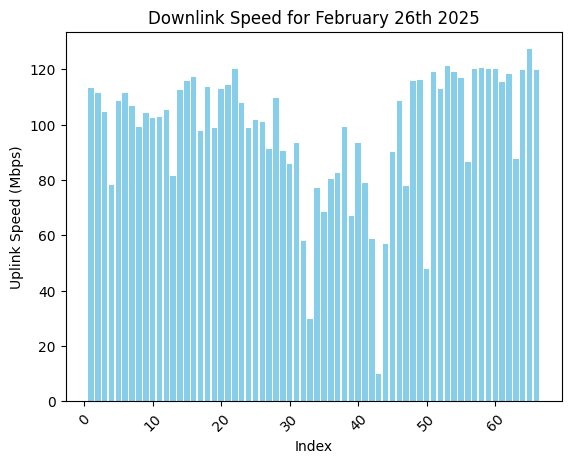

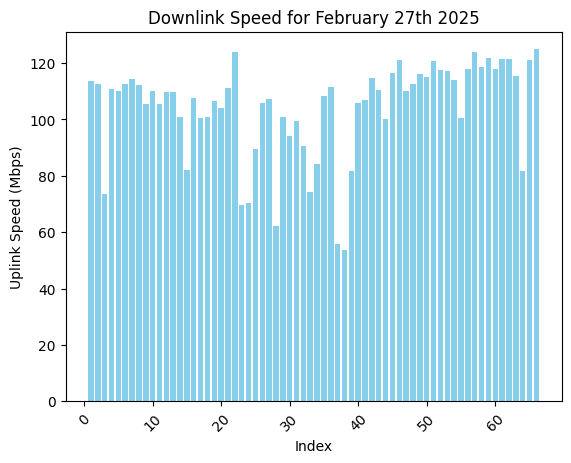

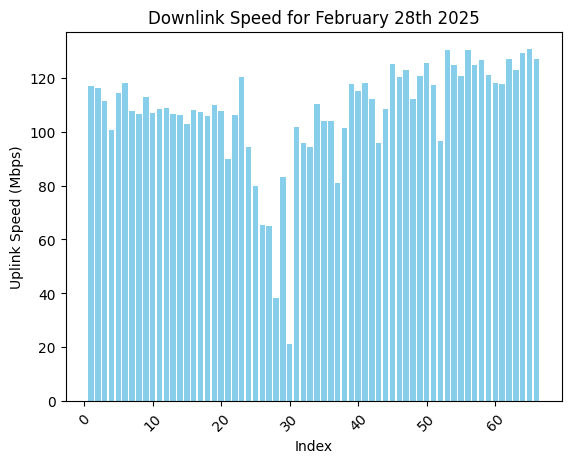

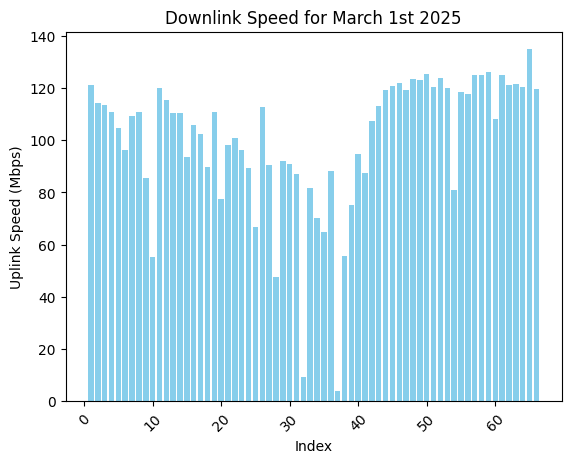

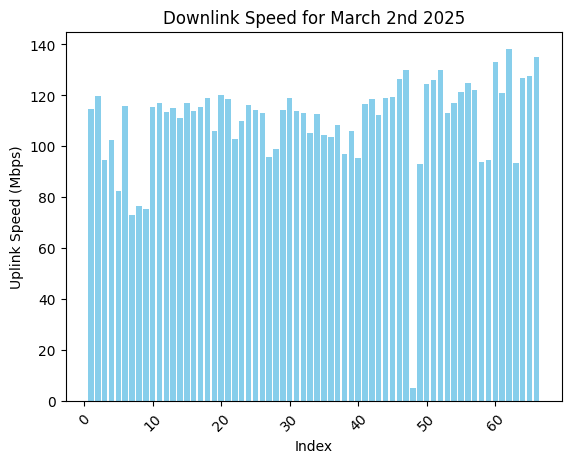

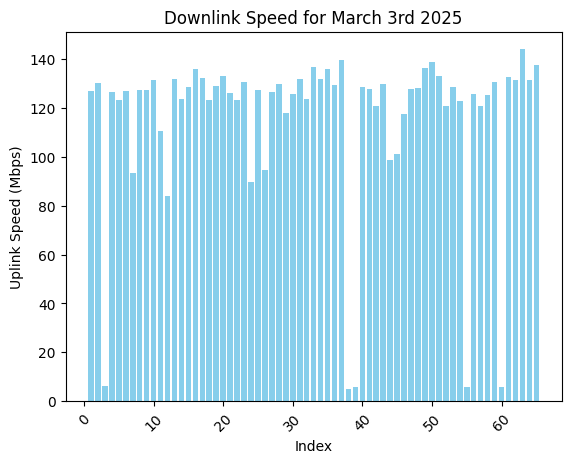

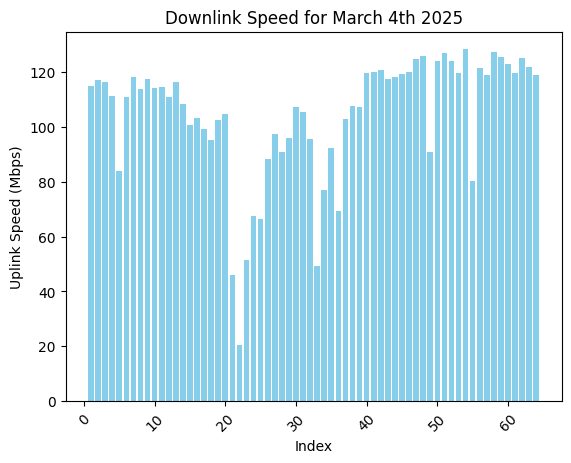

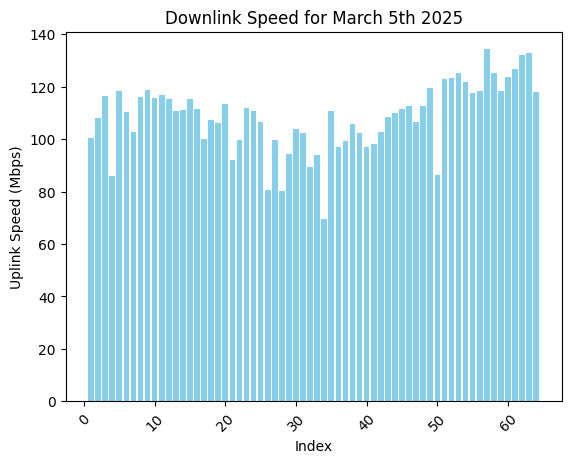

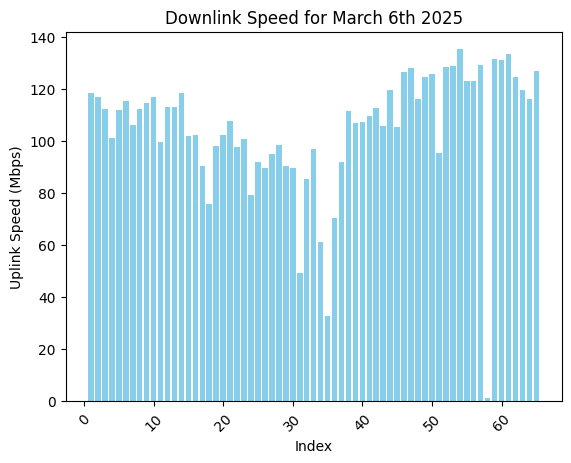

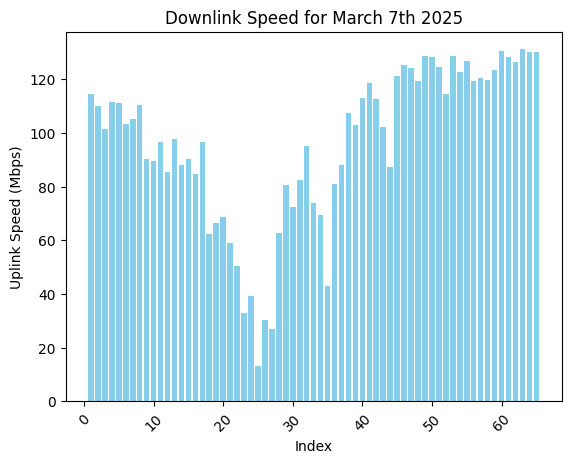

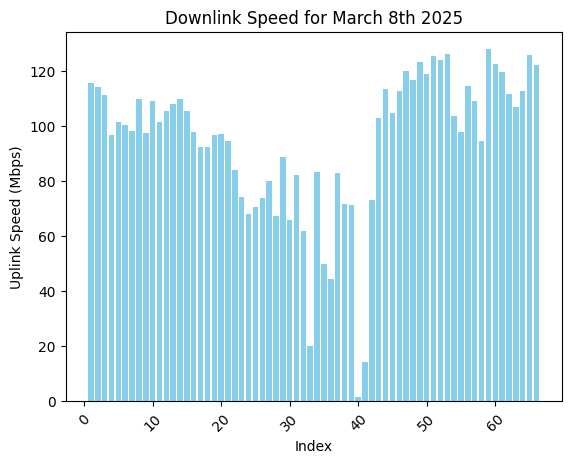

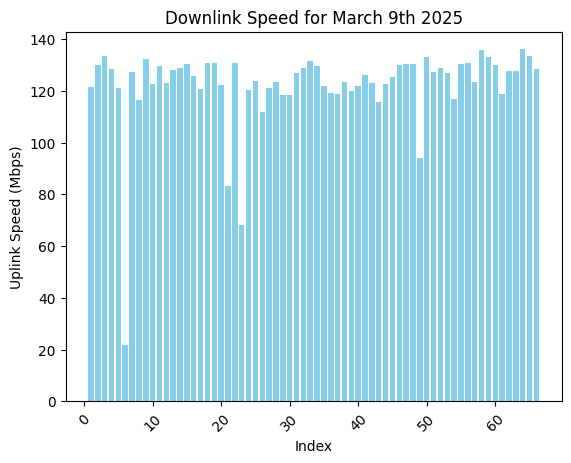

In [20]:
titles = ["February 26th 2025","February 27th 2025", "February 28th 2025", "March 1st 2025", "March 2nd 2025", "March 3rd 2025", "March 4th 2025", "March 5th 2025", "March 6th 2025", "March 7th 2025", "March 8th 2025", "March 9th 2025"]
for i, df_filtered in enumerate(dfs_filtered, start=0):
    plt.bar(range(1, len(df_filtered) + 1), df_filtered["upload"], color='skyblue')
    plt.xlabel('Index')
    plt.ylabel('Uplink Speed (Mbps)')
    plt.title(f'Downlink Speed for {titles[i]}')
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.show()

Some formating needs to be done. We extract hours, minutes, seconds from the timestamps before we will plot the results over multiple days

In [7]:
dfs_graph = dfs_filtered


dfs_graph = [
    df.assign(timestamp=pd.to_datetime(df["timestamp"]).dt.strftime("%H:%M:%S"))
    for df in dfs_graph
]

# Regular plot (Downlink)

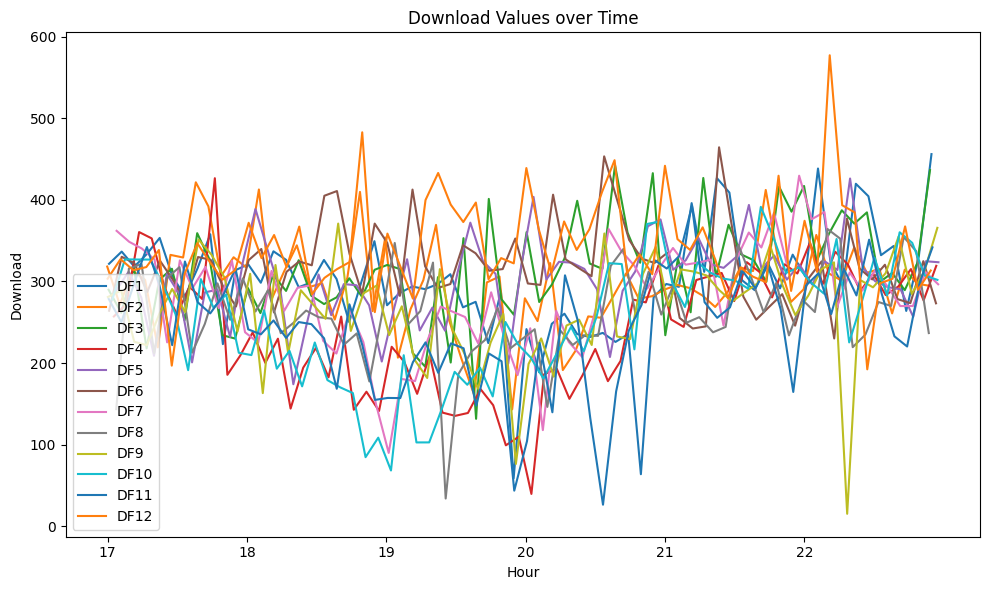

In [9]:
plt.figure(figsize=(10, 6))

# Plot each dataframe in dfs_graph
for i, df in enumerate(dfs_graph):
    # Convert 'timestamp' back to datetime for proper plotting
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%H:%M:%S")
    
    # Plot the download values against timestamp
    plt.plot(df["timestamp"], df["download"], label=f"DF{i+1}")

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Download')
plt.title('Download Values over Time')

# Format x-axis to only show exact hours
plt.xticks(
    pd.date_range(df["timestamp"].min(), df["timestamp"].max(), freq='h'),
    labels=[t.strftime('%H') for t in pd.date_range(df["timestamp"].min(), df["timestamp"].max(), freq='h')]
)

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Simple Moving Average Plot

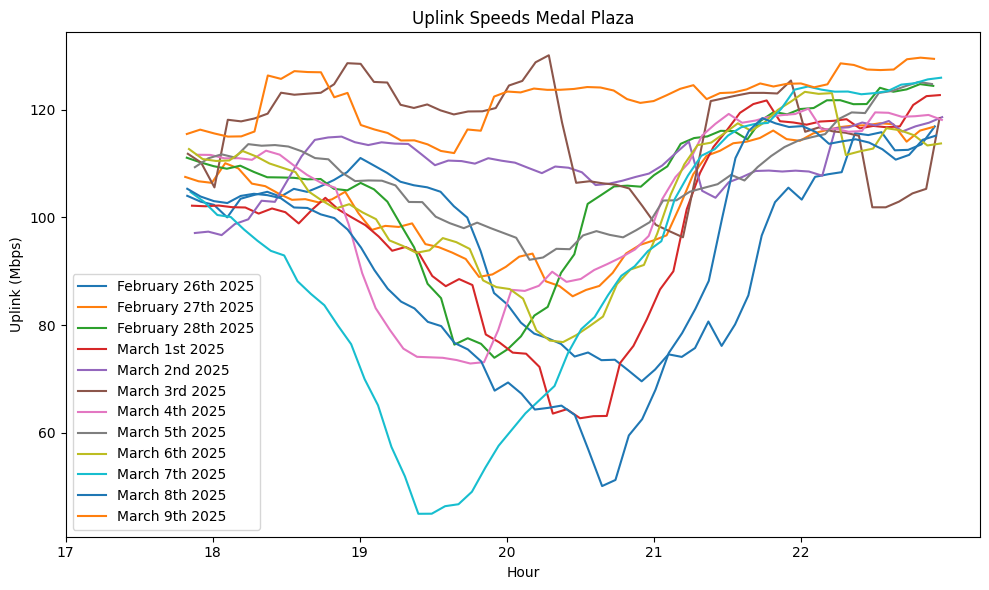

In [23]:
plt.figure(figsize=(10, 6))

for i, df in enumerate(dfs_graph):
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%H:%M:%S")
    df['uplink_sma'] = df['upload'].rolling(window=10).mean()
    plt.plot(df["timestamp"], df["uplink_sma"], label=titles[i])  
plt.xlabel('Hour')
plt.ylabel('Uplink (Mbps)')
plt.title('Uplink Speeds Medal Plaza')


plt.xticks(
    pd.date_range(df["timestamp"].min(), df["timestamp"].max(), freq='h'),
    labels=[t.strftime('%H') for t in pd.date_range(df["timestamp"].min(), df["timestamp"].max(), freq='h')]
)

plt.legend()
plt.tight_layout()
plt.show()

# Exponential Moving Average Plot

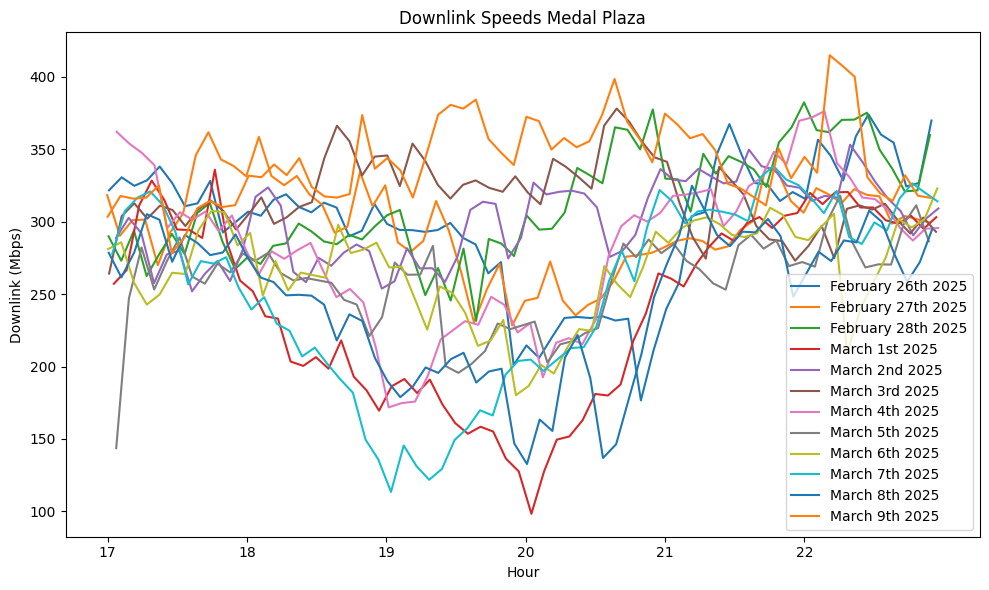

In [12]:
plt.figure(figsize=(10, 6))

for i, df in enumerate(dfs_graph):
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%H:%M:%S")
    df['download_sma'] = df['download'].ewm(span=5).mean() 
    plt.plot(df["timestamp"], df["download_sma"], label=titles[i])
plt.xlabel('Hour')
plt.ylabel('Downlink (Mbps)')
plt.title('Downlink Speeds Medal Plaza')


plt.xticks(
    pd.date_range(df["timestamp"].min(), df["timestamp"].max(), freq='h'),
    labels=[t.strftime('%H') for t in pd.date_range(df["timestamp"].min(), df["timestamp"].max(), freq='h')]
)

plt.legend()
plt.tight_layout()
plt.show()